<a href="https://colab.research.google.com/github/yohanesnuwara/carbon-capture-and-storage/blob/master/main/06_geomechanical_modelling_rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Data of stress and pore pressure gradient in KTB-1 (data of Rubianto, 2011)

In [0]:
# hydrostatic line, psi/ft
Sv_hyd = 0.92; Sh_hyd = 0.75; SH_hyd = 1.52; Pp_hyd = 0.43
# overpressure line
Sv_ovp = 0.92; Sh_ovp = 0.77; SH_ovp = 1.25; Pp_ovp = 0.54

Depth of formation tops

In [0]:
# formation name
topname = ['Ledok', 'Wonocolo', 'Ngrayong', 'Tuban', 'Kujung']
topdepth = [275, 340, 1053, 1637, 2777]

Overpressure in Tuban formation

In [0]:
top_ovp_depth = topdepth[3]
bottom_ovp_depth = topdepth[4]
top_ovp_depth

1637

Calculate stress magnitudes

In [0]:
# for hydrostatic formations (Ledok, Wonocolo, Ngrayong, Kujung)
depth = np.arange(0, 3510, 100)

Sv_arr = []; SH_arr = []; Sh_arr = []; Pp_arr = []
for i in range(len(depth)):
  if depth[i] < top_ovp_depth:
    Sv = depth[i] * Sv_hyd
    SH = depth[i] * SH_hyd
    Sh = depth[i] * Sh_hyd
    Pp = depth[i] * Pp_hyd

  if depth[i] >= top_ovp_depth and depth[i] <= bottom_ovp_depth:
    Sv = depth[i] * Sv_ovp
    SH = depth[i] * SH_ovp
    Sh = depth[i] * Sh_ovp
    Pp = depth[i] * Pp_ovp
  
  if depth[i] > bottom_ovp_depth:
    Sv = depth[i] * Sv_hyd
    SH = depth[i] * SH_hyd
    Sh = depth[i] * Sh_hyd
    Pp = depth[i] * Pp_hyd

  Sv_arr.append(float(Sv)) 
  SH_arr.append(float(SH)) 
  Sh_arr.append(float(Sh)) 
  Pp_arr.append(float(Pp))    

Plot Sv, SH, Sh, Pp lines

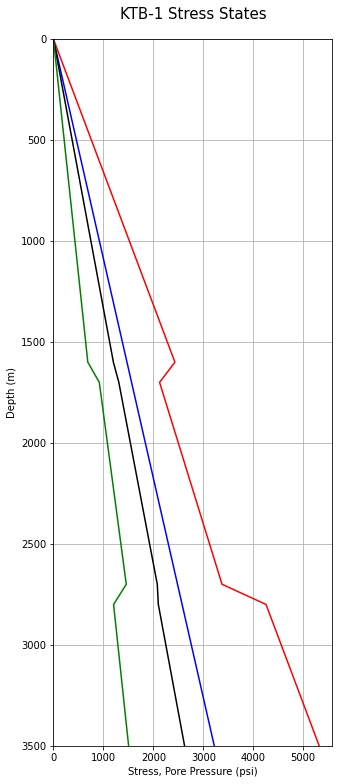

In [0]:
plt.figure(figsize=(5, 13))
plt.plot(Sv_arr, depth, color='blue')
plt.plot(SH_arr, depth, color='red')
plt.plot(Sh_arr, depth, color='black')
plt.plot(Pp_arr, depth, color='green')
plt.title("KTB-1 Stress States", pad=20, size=15)
plt.xlabel("Stress, Pore Pressure (psi)"); plt.ylabel("Depth (m)")
plt.grid(True)
plt.ylim(0, 3500); plt.xlim(xmin=0)
plt.gca().invert_yaxis()

Visualize bar-style stress diagram

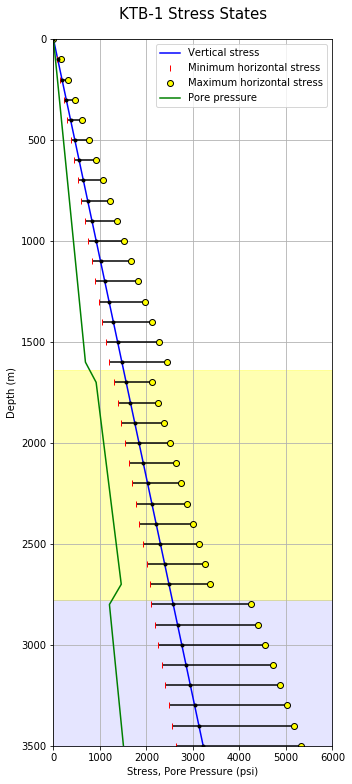

In [0]:
# technique using matplotlib errorbar
y = np.array(depth)
x1 = np.array(Sh_arr) # minimum horizontal stress
x2 = np.array(Sv_arr) # vertical stress
x3 = np.array(SH_arr) # maximum horizontal stress
# xerr = np.array([x1, (x3 - x2)])
xerr = np.array([(x2-x1), (x3-x2)])

plt.figure(figsize=(5, 13))

p1 = plt.plot(Sv_arr, depth, color='blue')
p2 = plt.plot(Sh_arr, depth, '|', color='red')
p3 = plt.plot(SH_arr, depth, 'o', mfc='yellow', color='black')
p4 = plt.plot(Pp_arr, depth, color='green')
plt.legend((p1[0], p2[0], p3[0], p4[0]), (['Vertical stress', 'Minimum horizontal stress', 'Maximum horizontal stress', 'Pore pressure']))

# stress bars
plt.errorbar(x2, y, xerr=xerr, fmt='.', color='black')

# fill overpressure zone
plt.fill_between([0, 6000], top_ovp_depth, bottom_ovp_depth, color='yellow', alpha=0.3) # overpressure Tuban shale zone
plt.fill_between([0, 6000], bottom_ovp_depth, 3500, color='blue', alpha=0.1) # overpressure Tuban shale zone

plt.title("KTB-1 Stress States", pad=20, size=15)
plt.xlabel("Stress, Pore Pressure (psi)"); plt.ylabel("Depth (m)")
plt.grid(True)
plt.ylim(0, 3500); plt.xlim(0,6000)
plt.gca().invert_yaxis()

Calculate in-situ stress at depth

In [0]:
# stress at depth 3400 m (injection point in Kujung), hydrostatic
depth = 3400 * 3.28084 # convert to ft
Sv_kujung = depth * Sv_hyd
print("In-situ Vertical stress magnitude:", Sv_kujung, "psi")
SH_kujung = depth * SH_hyd
print("In-situ Maximum horizontal stress magnitude:", SH_kujung, "psi")
Sh_kujung = depth * Sh_hyd
print("In-situ Minimum horizontal stress magnitude:", Sh_kujung, "psi")
Pp_kujung = depth * Pp_hyd
print("In-situ Pore pressure magnitude:", Pp_kujung, "psi")

# classify stresses as S1, S2, S3
stresses = np.sort(np.array([Sv_kujung, SH_kujung, Sh_kujung]))
S1 = stresses[2]; S2 = stresses[1]; S3 = stresses[0]
print("S1:", S1, "psi, S2:", S2, "psi, S3:", S3, "psi")

# regime according to E. M. Anderson theory
if Sv_kujung < Sh_kujung and Sh_kujung < SH_kujung:
  print("Regime is REVERSE (Sv < Sh < SH)")
if Sh_kujung < Sv_kujung and Sv_kujung < SH_kujung:
  print("Regime is STRIKE-SLIP (Sh < Sv < SH)")
if Sh_kujung < SH_kujung and SH_kujung < Sv_kujung:
  print("Regime is STRIKE-SLIP (Sh < SH < Sv)")

In-situ Vertical stress magnitude: 10262.46752 psi
In-situ Maximum horizontal stress magnitude: 16955.38112 psi
In-situ Minimum horizontal stress magnitude: 8366.142 psi
In-situ Pore pressure magnitude: 4796.5880799999995 psi
S1: 16955.38112 psi, S2: 10262.46752 psi, S3: 8366.142 psi
Regime is STRIKE-SLIP (Sh < Sv < SH)


Calculate effective stresses

In [0]:
# effective stresses (Terzaghi)
Sv_kujung_eff = Sv_kujung - Pp_kujung
print("Effective vertical stress magnitude:", Sv_kujung_eff, "psi")
SH_kujung_eff = SH_kujung - Pp_kujung
print("Effective maximum horizontal stress magnitude:", SH_kujung_eff, "psi")
Sh_kujung_eff = Sh_kujung - Pp_kujung
print("Effective minimum horizontal stress magnitude:", Sh_kujung_eff, "psi")

# effective stress of S1, S2, S3
stresses_eff = np.sort(np.array([Sv_kujung_eff, SH_kujung_eff, Sh_kujung_eff]))
S1_eff = stresses_eff[2]; S2_eff = stresses_eff[1]; S3_eff = stresses_eff[0]
print("S1 effective:", S1_eff, "psi, S2 effective:", S2_eff, "psi, S3 effective:", S3_eff, "psi")

Effective vertical stress magnitude: 5465.879440000001 psi
Effective maximum horizontal stress magnitude: 12158.793039999999 psi
Effective minimum horizontal stress magnitude: 3569.5539200000003 psi
S1 effective: 12158.793039999999 psi, S2 effective: 5465.879440000001 psi, S3 effective: 3569.5539200000003 psi


Calculate critical pore pressure and maximum pore pressure change

In [0]:
# frictional angle, coeff, cohesive strength
angle_frictional = 28
coeff_frictional = np.tan(np.deg2rad(angle_frictional))
cohesion = 5.5 * 145 # MPa to psi

# critical angle
angle_critical = (90 - angle_frictional) / 2

# critical normal and shear stress
normal_critical = (0.5 * (S1 + S3)) + ((0.5 * (S1 - S3)) * np.cos(np.deg2rad(2 * angle_critical)))
print("Normal stress at critical condition:", normal_critical, "psi")
shear_critical = 0.5 * (S1 - S3) * np.sin(np.deg2rad(2 * angle_critical))
print("Shear stress at critical condition:", shear_critical, "psi")

# critical Pp
Pp_critical = normal_critical + ((cohesion - shear_critical) / coeff_frictional)
print("Pore pressure at critical condition:", Pp_critical, "psi")

# max pore pressure change is difference between critical Pp and in-situ Pp
delta_Pp_limit = Pp_critical - Pp_kujung
print("Increase in pore pressure is only limitted to increase by:", delta_Pp_limit, "psi before reaching critical condition")

Normal stress at critical condition: 14676.963316404053 psi
Shear stress at critical condition: 3791.924002746863 psi
Pore pressure at critical condition: 9045.270845969731 psi
Increase in pore pressure is only limitted to increase by: 4248.682765969732 psi before reaching critical condition


## Test new equation

In [0]:
beta2 = 90 + angle_frictional
beta2

118

In [0]:
Pp_critical = (cohesion + (np.tan(np.deg2rad(angle_frictional)) * normal_critical) - shear_critical) / np.tan(np.deg2rad(angle_frictional))
Pp_critical

5012.867333161621

In [0]:
from scipy.optimize import fsolve

def f(Pp):
  f1 = ((2 * cohesion * np.tan(np.deg2rad(beta2))) + ((((np.sqrt((coeff_frictional**2) + 1)) + coeff_frictional)**2) * (S3 - Pp))) - (S1 - Pp)
  return(f1)

solve = fsolve(f, 1)
solve

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([1818.04260893])

Effective

In [0]:
# frictional angle, coeff, cohesive strength
angle_frictional = 28
coeff_frictional = np.tan(np.deg2rad(angle_frictional))
cohesion = 5.5 * 145 # MPa to psi

# critical angle
angle_critical = (90 - angle_frictional) / 2

# critical normal and shear stress
normal_critical = (0.5 * (S1_eff + S3_eff)) + ((0.5 * (S1_eff - S3_eff)) * np.cos(np.deg2rad(2 * angle_critical)))
print("Normal stress at critical condition:", normal_critical, "psi")
shear_critical = 0.5 * (S1_eff - S3_eff) * np.sin(np.deg2rad(2 * angle_critical))
print("Shear stress at critical condition:", shear_critical, "psi")

# critical Pp
Pp_critical = normal_critical + ((cohesion - shear_critical) / coeff_frictional)
print("Pore pressure at critical condition:", Pp_critical, "psi")

# # max pore pressure change is difference between critical Pp and in-situ Pp
# delta_Pp_limit = Pp_critical - Pp_kujung
# print("Increase in pore pressure is only limitted to increase by:", delta_Pp_limit, "psi before reaching critical condition")

Normal stress at critical condition: 9880.375236404054 psi
Shear stress at critical condition: 3791.924002746863 psi
Pore pressure at critical condition: 4248.682765969731 psi


## Mohr-Coulomb

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


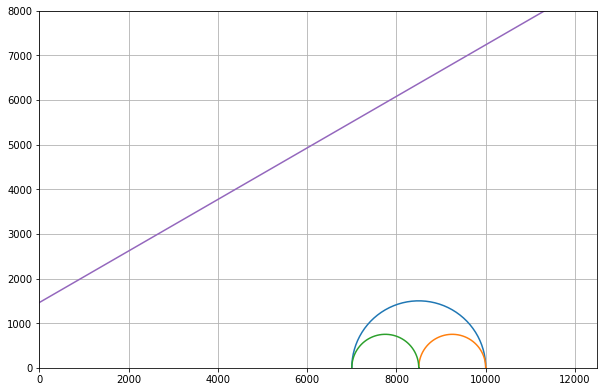

In [0]:
# S1_eff = 10000
# S2_eff = 8500
# S3_eff = 7000
# cohesion = 1462
# coeff_frictional = np.tan(np.deg2rad(30))

angles = np.arange(0, 181, 1)
# S1 and S3 circle
normals_13 = (0.5 * (S1_eff + S3_eff)) + ((0.5 * (S1_eff - S3_eff)) * np.cos(np.deg2rad(2 * angles)))
shears_13 = 0.5 * (S1_eff - S3_eff) * np.sin(np.deg2rad(2 * angles))

# S1 and S2 circle
normals_12 = (0.5 * (S1_eff + S2_eff)) + ((0.5 * (S1_eff - S2_eff)) * np.cos(np.deg2rad(2 * angles)))
shears_12 = 0.5 * (S1_eff - S2_eff) * np.sin(np.deg2rad(2 * angles))

# S2 and S3 circle
normals_23 = (0.5 * (S2_eff + S3_eff)) + ((0.5 * (S2_eff - S3_eff)) * np.cos(np.deg2rad(2 * angles)))
shears_23 = 0.5 * (S2_eff - S3_eff) * np.sin(np.deg2rad(2 * angles))

# mohr envelope
normal_array = np.arange(0, 20000, 10)
mohr_env = cohesion + (coeff_frictional * normal_array)

plt.figure(figsize=(10,10))
plt.plot(normals_13, shears_13)
plt.plot(normals_12, shears_12)
plt.plot(normals_23, shears_23)
plt.plot(normal_critical, shear_critical, '.')
plt.plot(normal_array, mohr_env)
plt.xlim(0, 12500); plt.ylim(0, 8000)
plt.grid(True)
plt.axes().set_aspect('equal')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


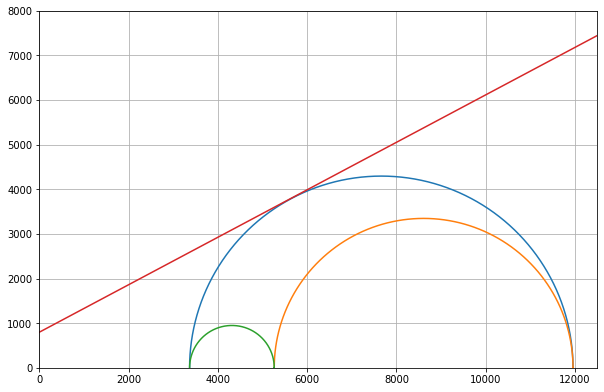

In [0]:
Pp_critical = 5000
angles = np.arange(0, 181, 1)
# S1 and S3 circle
normals_13 = (0.5 * ((S1 - Pp_critical) + (S3- Pp_critical))) + ((0.5 * ((S1- Pp_critical) - (S3- Pp_critical))) * np.cos(np.deg2rad(2 * angles)))
shears_13 = 0.5 * ((S1- Pp_critical) - (S3- Pp_critical)) * np.sin(np.deg2rad(2 * angles))

# S1 and S2 circle
normals_12 = (0.5 * ((S1- Pp_critical) + (S2- Pp_critical))) + ((0.5 * ((S1- Pp_critical) - (S2- Pp_critical))) * np.cos(np.deg2rad(2 * angles)))
shears_12 = 0.5 * ((S1- Pp_critical) - (S2- Pp_critical)) * np.sin(np.deg2rad(2 * angles))

# S2 and S3 circle
normals_23 = (0.5 * ((S2- Pp_critical) + (S3- Pp_critical))) + ((0.5 * ((S2- Pp_critical) - (S3- Pp_critical))) * np.cos(np.deg2rad(2 * angles)))
shears_23 = 0.5 * ((S2- Pp_critical) - (S3- Pp_critical)) * np.sin(np.deg2rad(2 * angles))

# mohr envelope
normal_array = np.arange(0, 20000, 10)
mohr_env = cohesion + (coeff_frictional * normal_array)

plt.figure(figsize=(10,10))
plt.plot(normals_13, shears_13)
plt.plot(normals_12, shears_12)
plt.plot(normals_23, shears_23)
plt.plot(normal_array, mohr_env)
plt.xlim(0, 12500); plt.ylim(0, 8000)
plt.grid(True)
plt.axes().set_aspect('equal')

# ***

array([3, 5, 6, 6])

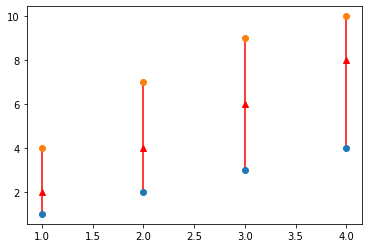

In [0]:
"Code for asymmetric bars"

import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.array([1,2,3,4])
y1 = np.array([1,2,3,4])
y2 = np.array([2,4,6,8])
y3 = np.array([4,7,9,10])
# err = [y1, np.array([2,3,3,2])]
err = np.array([y1, (y3-y2)])

# example variable error bar values
yerr = 0.2

plt.figure()
plt.plot(x, y1, 'o')
plt.plot(x,y3,'o')

plt.errorbar(x, y2, yerr=err, fmt='r^')
y3-y1

Cohesion strength and frictional sliding coefficient